#SVR

In [ ]:
import numpy as np

x = np.sort(5*np.random.rand(40, 1), axis = 0)
y = np.sin(x).ravel()
print(x[0:6], '\t', y[0:10] )

[[0.11562986]
 [0.31546018]
 [0.38405696]
 [0.42250832]
 [0.48228814]
 [0.66716383]] 	 [0.11537237 0.31025398 0.37468496 0.41004949 0.46380753 0.61876044
 0.76873408 0.90198235 0.9467626  0.95725827]


###svr_rbf (RBF 커널):사용 시나리오: 비선형 데이터 모델링
커널 함수: Radial Basis Function (RBF) 커널 또는 가우시안 커널
특징:
비선형 데이터에 적합하며, 데이터를 고차원 공간으로 매핑하여 비선형 관계를 모델링.
C와 gamma 매개변수 조정을 통해 모델의 복잡성과 결정 경계의 유연성을 조절할 수 있음.
예제 사용 사례: 이미지 분류, 주가 예측, 의료 진단 등
###svr_lin (선형 커널):

사용 시나리오: 선형 데이터 모델링 또는 데이터가 고차원 공간으로 매핑될 필요가 없는 경우
커널 함수: 선형 커널
특징:
데이터를 고차원 공간으로 매핑하지 않고 선형 결정 경계를 사용하여 모델링.
일반적으로 계산 비용이 적고 메모리 효율적.
예제 사용 사례: 선형 회귀, 가격 예측, 경제 예측 등
###svr_poly (다항 커널):

사용 시나리오: 데이터가 다항식 관계를 가지고 있거나 비선형 모델링이 필요한 경우
커널 함수: 다항 커널
특징:
다항식 커널을 사용하여 다항식 관계를 모델링. degree 매개변수로 다항식 차수를 조절.
다항식 커널은 비선형 관계를 캡처할 수 있으며, coef0를 통해 상수항을 조절.
예제 사용 사례: 자연어 처리, 시계열 예측, 데이터 분석 등

In [ ]:
from sklearn.svm import SVR

svr_rbf = SVR(kernel = 'rbf', C = 100, gamma = 0.1, epsilon = 0.1) # rbf 가우시안 커널 gamma: RBF 커널의 폭을 제어
svr_lin = SVR(kernel = 'linear', C = 100, epsilon = 0.1)  #C: 정규화 파라미터로, 모델의 복잡성을 조절
svr_poly = SVR(kernel = 'poly',C = 100, degree = 3, epsilon =0.1, coef0= 1 ) #degree는 차수를 지정 coef0: 다항 커널의 상수항을 조절

svr_rbf.fit(x, y)
svr_lin.fit(x, y)
svr_poly.fit(x, y)

SVR(C=100, coef0=1, kernel='poly')

In [ ]:
rbf_pred = svr_rbf.predict(x)
lin_pred = svr_lin.predict(x)
poly_pred = svr_poly.predict(x)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd
import numpy as np

preds = [rbf_pred, lin_pred, poly_pred]
kernel = ['Radial Basis Function', 'Linear', 'polynomial']
evls = ['mse', 'rmse', 'mae', 'r2']

results = pd.DataFrame(index = kernel,columns = evls)

for pred, nm in zip(preds, kernel):
  mse = mean_squared_error(y, pred)
  mae = mean_absolute_error(y, pred)
  rmse = np.sqrt(mse)
  r2 = r2_score(y, pred)

  results.loc[nm]['mse'] = round(mse, 2)
  results.loc[nm]['mae'] = round(mae, 2)
  results.loc[nm]['rmse'] = round(rmse, 2)
  results.loc[nm]['r2'] = round(r2, 2)

results



,mse,rmse,mae,r2
Radial Basis Function,0.08,0.28,0.18,0.82
Linear,0.25,0.5,0.37,0.44
polynomial,0.09,0.3,0.16,0.79


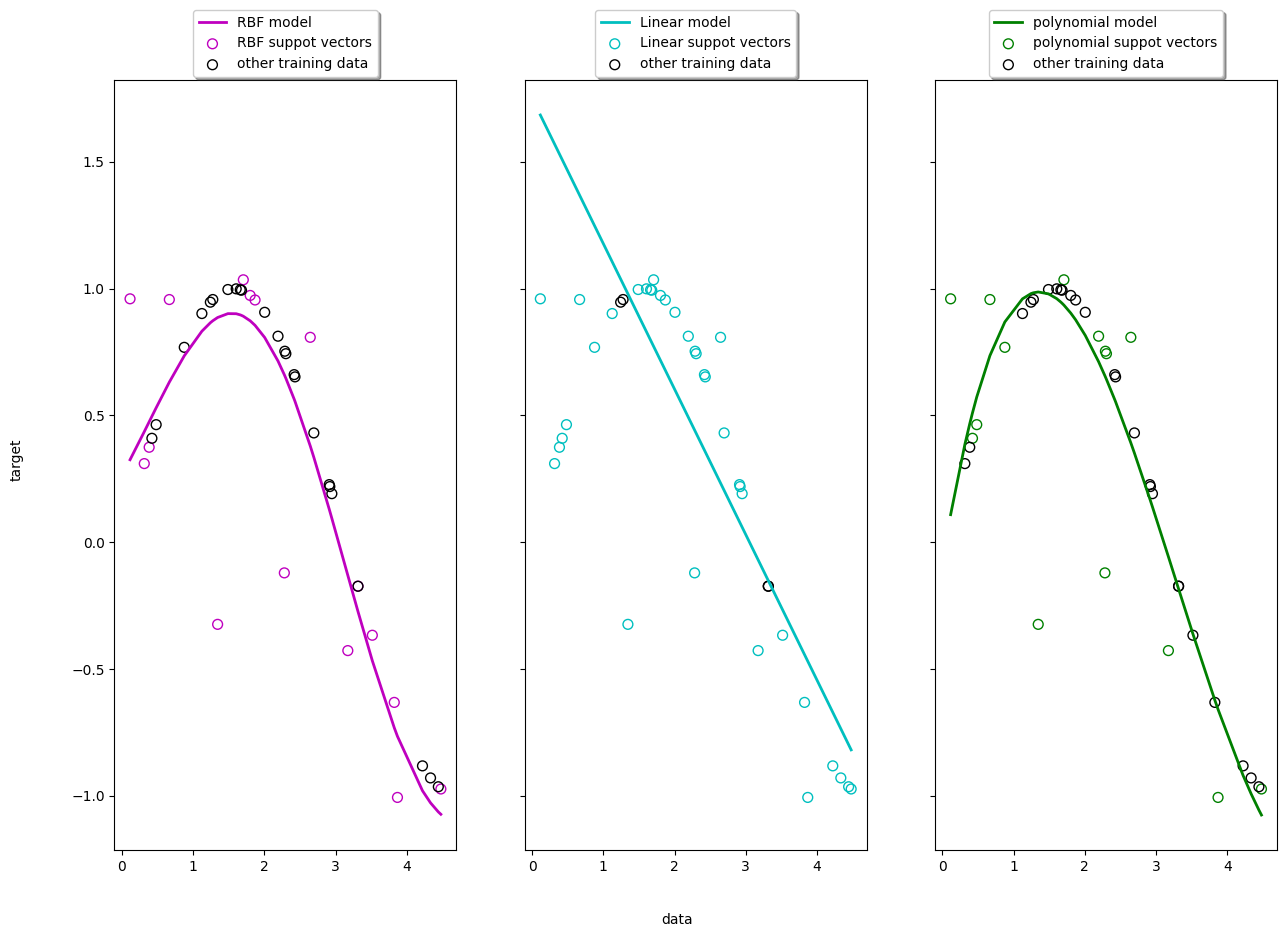

In [ ]:
lw = 2

svrs = [svr_rbf, svr_lin, svr_poly]
kernel_label = ['RBF', 'Linear', 'polynomial']
model_color = ['m', 'c', 'g']

fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (15, 10), sharey = True)
for ix, svr in enumerate(svrs):
  axes[ix].plot(x, svr.fit(x, y).predict(x), color = model_color[ix],lw = lw, label = '{} model'.format(kernel_label[ix]))
  axes[ix].scatter(x[svr.support_],y[svr.support_], facecolor= 'none', edgecolor = model_color[ix], s = 50, label = '{} suppot vectors'.format(kernel_label[ix]))
  axes[ix].scatter(x[np.setdiff1d(np.arange(len(x)), svr.support_)], y[np.setdiff1d(np.arange(len(x)),svr.support_)],facecolor = 'none', edgecolor = 'k', s = 50, label = 'other training data')
  axes[ix].legend(loc = 'upper center', bbox_to_anchor = (0.5, 1.1), ncol = 1, fancybox = True, shadow = True)

fig.text(0.5, 0.04, 'data', ha = 'center', va = 'center')
fig.text(0.06, 0.5, 'target', ha = 'center', va = 'center', rotation = 'vertical')
plt.show()

In [ ]:
y[::5] += 3*(0.5 - np.random.rand(8))

print(y[0:10])

[0.96005059 0.31025398 0.37468496 0.41004949 0.46380753 0.95720999
 0.76873408 0.90198235 0.9467626  0.95725827]
